# HW 1: Perceptron

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# make the code reproducible 
np.random.seed(3)

## Generate Data

In [3]:
n = 50
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

## Visualize Data

In [4]:
def plot_perceptron(X,y,w,plot_classification_boundary=True):
    for index, row in X.iterrows():
        if y[index] > 0:
            plt.scatter(row[0],row[1],color='blue',marker='s',label="y=1")
        else: 
            plt.scatter(row[0],row[1],color='red',marker='o',label="y=-1")

    plt.xlim(-2,2)
    plt.ylim(-2,2)

    if plot_classification_boundary:
        x1samples = np.arange(np.min(X['feature 1']),np.max(X['feature 1']),0.1)
        plt.plot(x1samples, [-(w[0]*x1 + w[2])/w[1] for x1 in x1samples],color='black',label='classification boundary')
    plt.show()

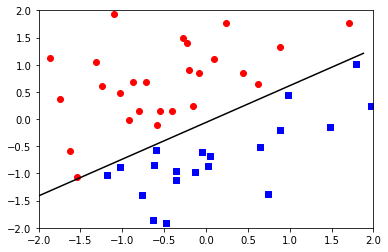

In [5]:
plot_perceptron(X,y,w_true)

## a) Code the missing parts of the Perceptron algorithm

Inputs to Perceptron are:

required arguments: <br>
X = data points <br>
Y = true values <br>

optional arguments: <br>
maxiters = maximum number of updates to w (default: 100) <br>
w_0 = initial guess of w (default: random) <br>

Perceptron should start with the input guess of w, look at most maxchecks data points and make at most maxiters updates, and return the final w.

In [6]:
# Python does not allow the argument of a function to depend on another argument, 
# so we bypass the issue by setting w_0 = None and assigning it immediately in the function
def perceptron(X=X,y=y,w_0=None,maxiters=100): 
    if w_0 is None:
        w_0=randn(X.shape[1])
    
    ### ENTER YOUR CODE HERE
    # learning rate
    learningRate = 0.01
    for epoch in range(maxiters):
        for i in range(X.shape[0]):
            z = np.dot(w_0, X[i])
            # activation function
            activationFunc = np.sign(z)
            er = y[i] - activationFunc
            dw = er*X[i]
            # update w
            w_0 = w_0 - learningRate*dw
    return w_0

In [7]:
xn = np.array(X)
yn = np.array(y)
w_t = pd.Series(randn(d+1), index=X.columns)
w_t = np.array(w_t)

## b) Run perceptron on the above linearly separable data set

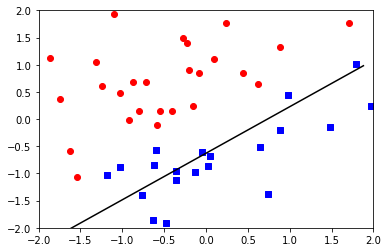

In [8]:
plot_perceptron(X,y,perceptron(xn,yn))

## c) Run perceptron on data sets of size n = 20, 100, and 1000

In [10]:
n = 20
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

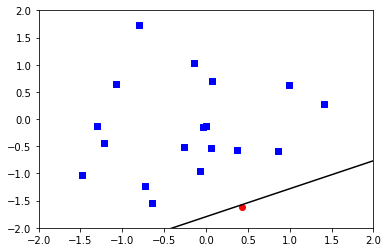

In [11]:
plot_perceptron(X,y,w_true)

In [12]:
n = 100
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

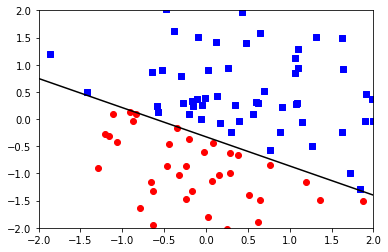

In [13]:
plot_perceptron(X,y,w_true)

In [14]:
n = 1000
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

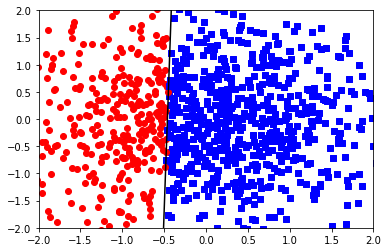

In [15]:
plot_perceptron(X,y,w_true)

## d) Run perceptron on data set of size n=1000 with dimension d=10

In [16]:
n = 1000
d = 10
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'feature 3': randn(n),
                'feature 4': randn(n),
                'feature 5': randn(n),
                'feature 6': randn(n),
                'feature 7': randn(n),
                'feature 8': randn(n),
                'feature 9': randn(n),
                'feature 10': randn(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d), index=X.columns)
y = np.sign(X.dot(w_true))

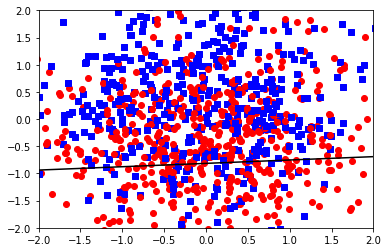

In [17]:
plot_perceptron(X,y,w_true)

## e) Run perceptron on dataset from (d) 100 times

In [18]:
n = 100
d = 10
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'feature 3': randn(n),
                'feature 4': randn(n),
                'feature 5': randn(n),
                'feature 6': randn(n),
                'feature 7': randn(n),
                'feature 8': randn(n),
                'feature 9': randn(n),
                'feature 10': randn(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d), index=X.columns)
y = np.sign(X.dot(w_true))

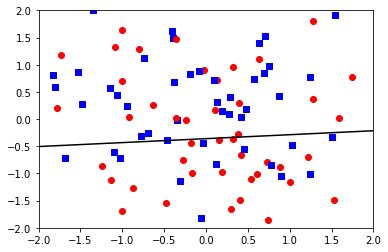

In [21]:
plot_perceptron(X,y,w_true)

In [22]:
def perceptron(X=X,y=y,w_0=None,maxiters=100): 
    if w_0 is None:
        w_0=randn(X.shape[1])
    
    ### ENTER YOUR CODE HERE
    # learning rate
    learningRate = 0.01
    p = []

    for iteration in range(maxiters):
        es = 0
        for i in range(X.shape[0]):
            z = np.dot(w_0, X.loc[i])
            # activation function
            activationFunc = np.sign(z)
            er = y[i] - activationFunc
            dw = er*np.random.randn(10)
            # update w
            w_0 = w_0 - learningRate*dw
        pe = es/X.shape[0]
        p.append(pe)
    return w_0, p

Plot a histogram for the number of updates that the algorithm takes to converge.

For this portion, make sure your perceptron implementation picks the next consideration point randomly instead of deterministically.

## f)  Summarize your conclusions with respect to accuracy and running time as a function of n (size of data set) and d (dimension). 

For this part, assume the data is not linearly separable and given a 1-2 sentence qualitative response for all 4 cases (accuracy/running time vs $n$/$d$). (If your perceptron always converges, then the accuracy will be perfect; if you stop before convergence, eg because it's taking too long to run, your accuracy will be less than perfect.)

**RESPONSE: **

In [ ]:
aghar andaze dade haye tamrini ra ziad konim deghat perceptron ham ziad mishavad vali zaman mored niaz baraye hadgiri ham ziad mishavad.
ba afzayesh abad vorodi ham hamin etefag mioftad